In [51]:
%matplotlib inline
datapath = "../data/dl1/objnc/rep/nofinetune/"
fraction = 0.9
models = ['input','pool1','pool2','pool3',\
          'pool4','pool5','d1','d2','d3']

In [18]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import linregress, spearmanr, pearsonr
import dimest; reload(dimest)
plt.style.use('ggplot')

In [19]:
D = np.load(datapath + 'D_sq.npy')

In [20]:
R = []
for i in range(len(D)):
    R.append(dimest.estimate_dim(D[i], fraction, False))

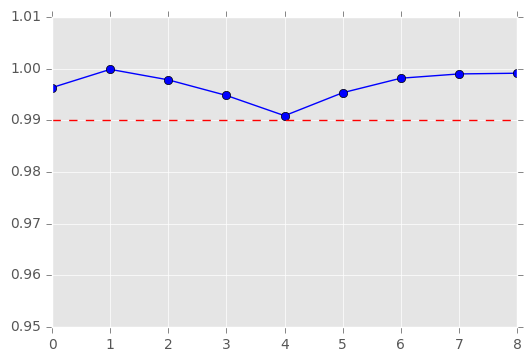

In [21]:
dimest.plot_correlations(R,models)

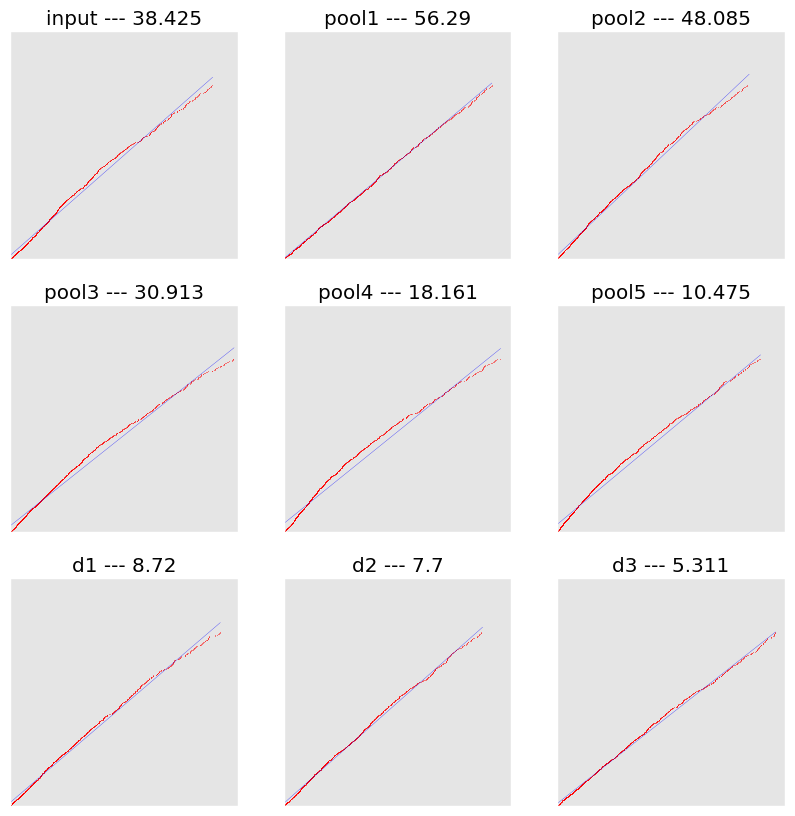

In [22]:
dimest.plot_cumulatives(R,fraction,models)

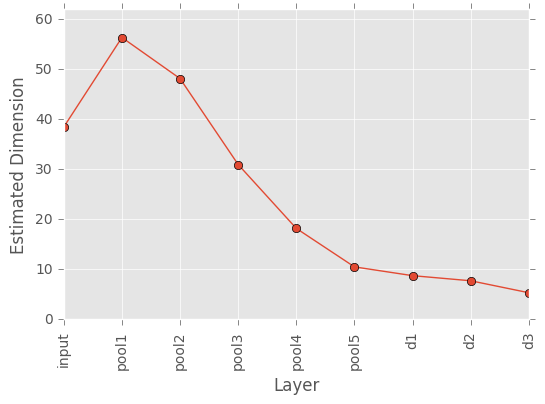

In [23]:
dimest.plot_dimensions(R,models)

(array([  1.53452360e-04,   2.57645195e-04,   4.19758164e-04, ...,
          2.98340572e+00,   2.99943457e+00,   3.65826277e+00]),
 array([ -0.00000000e+00,   6.94685683e-04,   1.38985429e-03, ...,
          5.88610403e+00,   6.17378610e+00,   6.57925121e+00]),
 LinregressResult(slope=2.4406381678856106, intercept=0.097124773683764709, rvalue=0.99555521988419304, pvalue=0.0, stderr=0.0064184168932626311),
 0.99555521988419327,
 0.0)

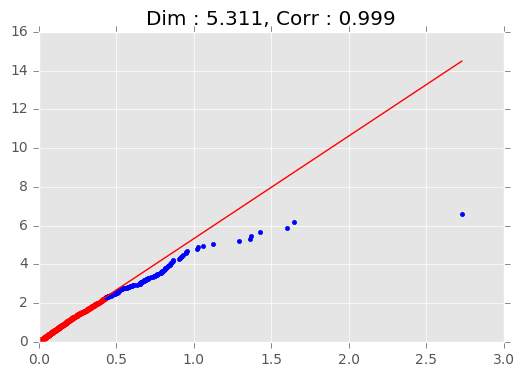

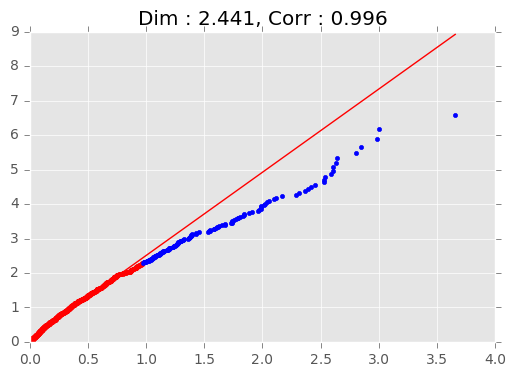

In [56]:
datapath = "../data/dl1/objnc/rep/nofinetune/"
D_noft = np.load(datapath + 'D_sq.npy')
dimest.estimate_dim(D_noft[-1], fraction = 0.9, plot_dim = True)

datapath = "../data/dl1/objnc/rep/finetune/"
D_ft = np.load(datapath + 'D_sq.npy')
dimest.estimate_dim(D_ft[-1], fraction = 0.9, plot_dim = True)

In [41]:
R_ft[0]

(array([  3.49656278e-05,   5.48076017e-05,   7.22182325e-05, ...,
          2.19037881e-01,   2.23251942e-01,   2.56440266e-01]),
 array([ -0.00000000e+00,   6.94685683e-04,   1.38985429e-03, ...,
          5.88610403e+00,   6.17378610e+00,   6.57925121e+00]),
 LinregressResult(slope=38.424996586820086, intercept=0.04409728211495334, rvalue=0.99631779078347704, pvalue=0.0, stderr=0.091921665153981064),
 0.9963177907834776,
 0.0)

In [24]:
#from mayavi.mlab import points3d
from sklearn.decomposition import PCA

In [25]:
rep = np.load(datapath + 'dense_1.npy')
rep.shape

(1440L, 4096L)

In [26]:
# pca
pca = PCA()
pca.fit(rep)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

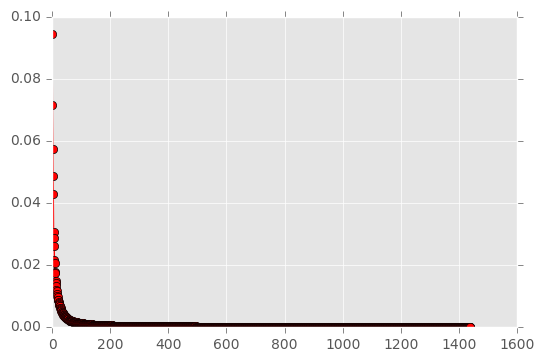

In [27]:
plt.plot(pca.explained_variance_ratio_, '-ro')
plt.show()

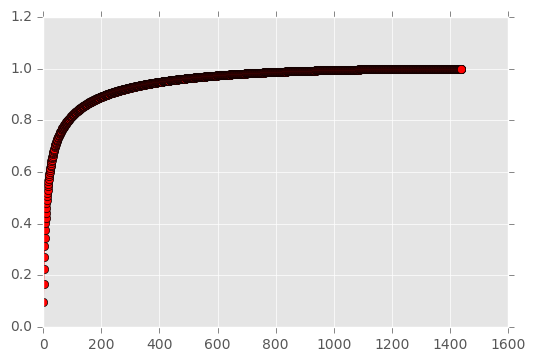

In [28]:
plt.plot(np.cumsum(pca.explained_variance_ratio_), '-ro')
plt.show()

In [29]:
# pca
pca = PCA(n_components=3)
pca.fit(rep)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [30]:
new = pca.transform(rep)
new.shape

(1440L, 3L)

In [31]:
from mpl_toolkits.mplot3d import Axes3D

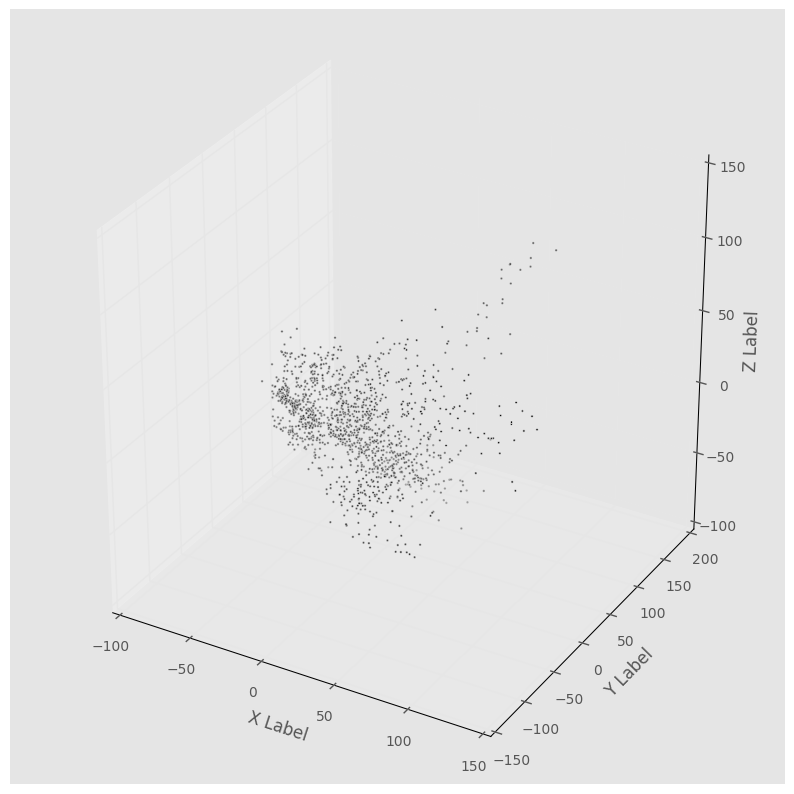

In [32]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(new[:,0],new[:,1],new[:,2],'.',s=3,c='k')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()